# Introduction to Python 2

## Creating Functions

<section class="objectives panel panel-warning">
<div class="panel-heading">
<h3><span class="fa fa-certificate"></span> Learning Objectives: </h3>
</div>

- Define a function that takes parameters.
- Return a value from a function.
- Test and debug a function.
- Set default values for function parameters.
- Explain why we should divide programs into small, single-purpose functions.

At this point, we’ve written code to draw some interesting features in our inflammation data, loop over all our data files to quickly draw these plots for each of them, and have Python make decisions based on what it sees in our data. But, our code is getting pretty long and complicated; what if we had thousands of datasets, and didn’t want to generate a figure for every single one? Commenting out the figure-drawing code is a nuisance. Also, what if we want to use that code again, on a different dataset or at a different point in our program? Cutting and pasting it is going to make our code get very long and very repetitive, very quickly. We’d like a way to package our code so that it is easier to reuse, and Python provides for this by letting us define things called ‘functions’ - a shorthand way of re-executing longer pieces of code.

Let’s start by defining a function `kelvin_to_celsius` that converts temperatures from Kelvin to Celsius:

In [1]:
# Let's get our import statements out of the way first
from __future__ import division, print_function
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def kelvin_to_celcius(temp):
    return temp - 273.15

The function definition opens with the word `def`, which is followed by the name of the function and a parenthesized list of parameter names. The body of the function — the statements that are executed when it runs — is indented below the definition line, typically by four spaces.

When we call the function, the values we pass to it are assigned to those variables so that we can use them inside the function. Inside the function, we use a [return statement](http://swcarpentry.github.io/python-novice-inflammation/reference.html#return-statement) to send a result back to whoever asked for it.

Let’s try running our function. Calling our own function is no different from calling any other function:

In [6]:
print('absolute zero in celcius is', kelvin_to_celcius(0.0))

absolute zero in celcius is -273.15


We’ve successfully called the function that we defined, and we have access to the value that we returned.

### Integer division

We are using Python 3 division, which always returns a floating point number:

In [7]:
print(5/9)

0.555555555556


Unfortunately, this wasn’t the case in Python 2:

In [8]:
!python2 -c " print 5/9"

'python2' is not recognized as an internal or external command,
operable program or batch file.


If you are using Python 2 and want to keep the fractional part of division you need to convert one or the other number to floating point:

And if you want an integer result from division in Python 3, use a double-slash:

In [9]:
5//9

0

### Composing Functions

Now that we’ve seen how to turn Kelvin into Celsius, let's try converting Celsius to Fahrenheit:

In [11]:
def celcius_to_fahrenheit(temp):
    return temp*(9/5) + 32

print('freezing point of water in fahrenheit ', celcius_to_fahrenheit(0))
print('boiling point of water in fahrenheit ', celcius_to_fahrenheit(100))

freezing point of water in fahrenheit  32.0
boiling point of water in fahrenheit  212.0


What about converting Kelvin to Fahrenheit? We could write out the formula, but we don’t need to. Instead, we can compose the two functions we have already created:

In [15]:
def kelvin_to_fahrenheit(temp):
    temp_c = kelvin_to_celcius(temp)
    result = celcius_to_fahrenheit(temp_c)
    return result

print('absolute zero in fahrenheit', kelvin_to_fahrenheit(0))

absolute zero in fahrenheit -459.67


This is our first taste of how larger programs are built: we define basic operations, then combine them in ever-larger chunks to get the effect we want. Real-life functions will usually be larger than the ones shown here — typically half a dozen to a few dozen lines — but they shouldn’t ever be much longer than that, or the next person who reads it won’t be able to understand what’s going on.

### Tidying up

Now that we know how to wrap bits of code up in functions, we can make our inflammation analyasis easier to read and easier to reuse. First, let’s make an `analyse` function that generates our plots:

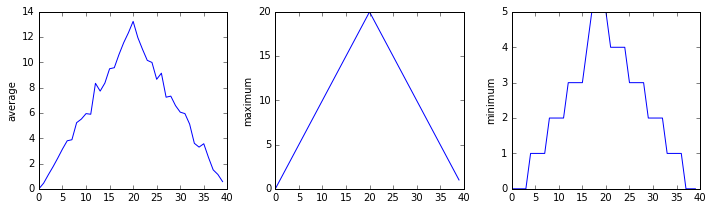

In [17]:
def analyse(filename):
    data = np.loadtxt(fname=filename, delimiter=',')
    
    fig = plt.figure(figsize=(10.0, 3.0))
    
    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)
    
    axes1.set_ylabel('average')
    axes1.plot(data.mean(axis=0))
    
    axes2.set_ylabel('maximum')
    axes2.plot(data.max(axis=0))
    
    axes3.set_ylabel('minimum')
    axes3.plot(data.min(axis=0))
    
    fig.tight_layout()
    plt.show(fig)
    
analyse('data/inflammation-01.csv')

and another function called `detect_problems` that checks for those systematics we noticed:

In [21]:
def detect_problems(filename):
    data = np.loadtxt(fname=filename, delimiter=',')
    
    if data.max(axis=0)[0] == 0 and data.max(axis=0)[20]==20:
        print('suspicious looking maxima')
    elif data.min(axis=0).sum() == 0:
        print('minima sum to zero')
    else:
        print('seems fine')
        
detect_problems('data/inflammation-01.csv')

suspicious looking maxima


Notice that rather than jumbling this code together in one giant `for` loop, we can now read and reuse both ideas separately. We can reproduce the previous analysis with a much simpler `for` loop:

data\inflammation-07.csv


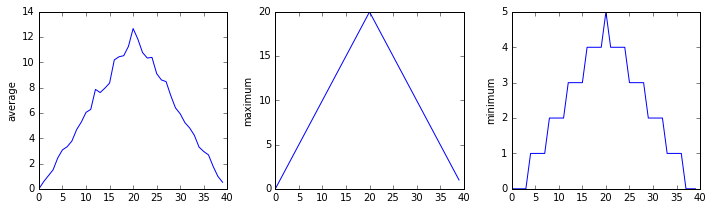

suspicious looking maxima
data\inflammation-08.csv


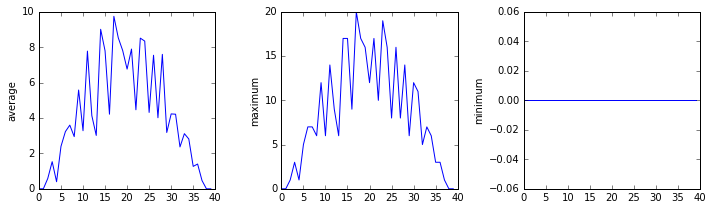

minima sum to zero
data\inflammation-09.csv


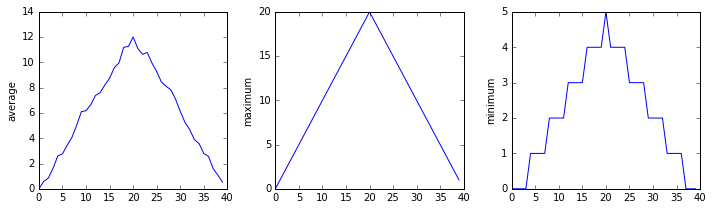

suspicious looking maxima
data\inflammation-10.csv


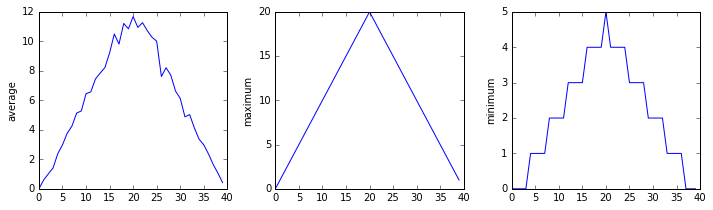

suspicious looking maxima
data\inflammation-11.csv


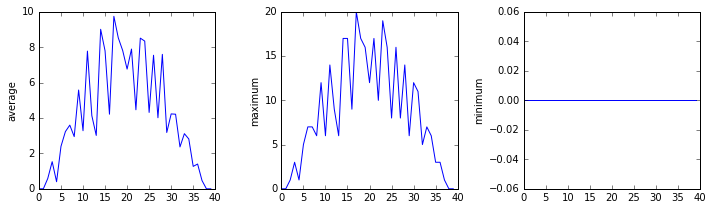

minima sum to zero
data\inflammation-12.csv


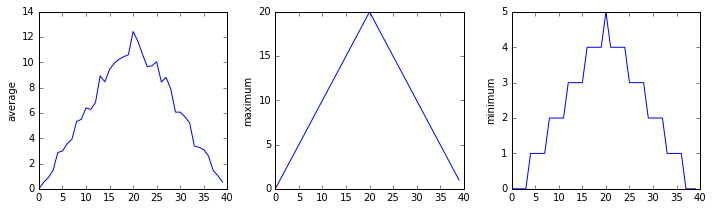

suspicious looking maxima


In [28]:
# First redefine our list of filenames from the last lesson
filenames = sorted(glob.glob('data/inflammation*.csv'))
for f in filenames [6:]:
    print(f)
    analyse(f)
    detect_problems(f)


By giving our functions human-readable names, we can more easily read and understand what is happening in the `for` loop. Even better, if at some later date we want to use either of those pieces of code again, we can do so in a single line.

### Testing and Documenting

Once we start putting things in functions so that we can re-use them, we need to start testing that those functions are working correctly. To see how to do this, let’s write a function to center a dataset around a particular value:

In [29]:
def centre(data, desired):
    return (data - data.mean()) + desired

We could test this on our actual data, but since we don’t know what the values ought to be, it will be hard to tell if the result was correct. Instead, let’s use NumPy to create a matrix of 0’s and then center that around 3:

In [30]:
z = np.zeros((2,2))
print(z)
print(centre(z,3))

[[ 0.  0.]
 [ 0.  0.]]
[[ 3.  3.]
 [ 3.  3.]]


That looks right, so let’s try `center` on our real data:

In [31]:
data = np.loadtxt(fname='data/inflammation-01.csv', delimiter=',')
print(centre(data,0))

[[-6.14875 -6.14875 -5.14875 ..., -3.14875 -6.14875 -6.14875]
 [-6.14875 -5.14875 -4.14875 ..., -5.14875 -6.14875 -5.14875]
 [-6.14875 -5.14875 -5.14875 ..., -4.14875 -5.14875 -5.14875]
 ..., 
 [-6.14875 -5.14875 -5.14875 ..., -5.14875 -5.14875 -5.14875]
 [-6.14875 -6.14875 -6.14875 ..., -6.14875 -4.14875 -6.14875]
 [-6.14875 -6.14875 -5.14875 ..., -5.14875 -5.14875 -6.14875]]


It’s hard to tell from the default output whether the result is correct, but there are a few simple tests that will reassure us:

In [34]:
print('original min, mean and max are', data.min(), data.mean(), data.max())
centred= centre(data,0)
print('min, mean and max of centred data are', centred.min(), centred.mean(), centred.max())

original min, mean and max are 0.0 6.14875 20.0
min, mean and max of centred data are -6.14875 2.84217094304e-16 13.85125


That seems almost right: the original mean was about 6.1, so the lower bound from zero is how about -6.1. The mean of the centered data isn’t quite zero — we’ll explore why not in the challenges — but it’s pretty close. We can even go further and check that the standard deviation hasn’t changed:

In [35]:
print( 'standard deviation before and after:', data.std(), centred.std())

standard deviation before and after: 4.61383319712 4.61383319712


Those values look the same, but we probably wouldn’t notice if they were different in the sixth decimal place. Let’s do this instead:

In [36]:
print('difference in standard deviation is', data.std() - centred.std())

difference in standard deviation is 0.0


Again, the difference is very small. It’s still possible that our function is wrong, but it seems unlikely enough that we should probably get back to doing our analysis. We have one more task first, though: we should write some [documentation](http://swcarpentry.github.io/python-novice-inflammation/reference.html#documentation) for our function to remind ourselves later what it’s for and how to use it.

The usual way to put documentation in software is to add [comments](http://swcarpentry.github.io/python-novice-inflammation/reference.html#comment) like this:

In [37]:
# centre(data, desired): return a new array containing the original data centered around the desired value.
def centre(data, desired):
    return (data - data.mean()) + desired

There’s a better way, though. If the first thing in a function is a string that isn’t assigned to a variable, that string is attached to the function as its documentation:

In [41]:
def centre(data, desired):
    """Return a new array containing original data centred around desired value"""
    #three quotation marks to make a 'docstring'
    return (data - data.mean()) + desired

This is better because we can now ask Python’s built-in help system to show us the documentation for the function:

In [39]:
help(centre)

Help on function centre in module __main__:

centre(data, desired)
    Return a new array containing original data centred around desired value



A string like this is called a [docstring](http://swcarpentry.github.io/python-novice-inflammation/reference.html#docstring). We don’t need to use triple quotes when we write one, but if we do, we can break the string across multiple lines:

### Defining Defaults

We have passed parameters to functions in two ways: directly, as in `type(data)`, and by name, as in `numpy.loadtxt(fname='something.csv', delimiter=',')`. In fact, we can pass the filename to `loadtxt` without the `fname=`:

In [42]:
np.loadtxt('data/inflammation-01.csv', delimiter=',')

array([[ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  1.,  2., ...,  1.,  0.,  1.],
       [ 0.,  1.,  1., ...,  2.,  1.,  1.],
       ..., 
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  2.,  0.],
       [ 0.,  0.,  1., ...,  1.,  1.,  0.]])

but we still need to say `delimiter=`:

In [45]:
np.loadtxt('data/inflammation-01.csv', ',')

TypeError: data type "," not understood

To understand what’s going on, and make our own functions easier to use, let’s re-define our center function like this:

In [46]:
def centre(data, desired=0.0):
    return (data - data.mean()) + desired

The key change is that the second parameter is now written `desired=0.0` instead of just `desired`. If we call the function with two arguments, it works as it did before:

In [51]:
test_data = np.zeros((2,2))
print(centre(test_data, 3))

[[ 3.  3.]
 [ 3.  3.]]


But we can also now call it with just one parameter, in which case `desired` is automatically assigned the [default value](http://swcarpentry.github.io/python-novice-inflammation/reference.html#default-value) of 0.0:

In [52]:
test_data = np.zeros((2,2))
print(centre(test_data))

[[ 0.  0.]
 [ 0.  0.]]


This is handy: if we usually want a function to work one way, but occasionally need it to do something else, we can allow people to pass a parameter when they need to but provide a default to make the normal case easier. The example below shows how Python matches values to parameters:

In [60]:
def display(a=1, b=2, c=3):
    print('a:', a, 'b:', b, 'c:', c)
    
print('no parameters', display())
print('two parameters', display(12, 3))
print('specific parameters', display(c=100))

a: 1 b: 2 c: 3
no parameters None
a: 12 b: 3 c: 3
two parameters None
a: 1 b: 2 c: 100
specific parameters None


As this example shows, parameters are matched up from left to right, and any that haven’t been given a value explicitly get their default value. We can override this behavior by naming the value as we pass it in:

With that in hand, let’s look at the help for numpy.loadtxt:

In [64]:
help(np.loadtxt)

Help on function loadtxt in module numpy.lib.npyio:

loadtxt(fname, dtype=<type 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
    Load data from a text file.
    
    Each row in the text file must have the same number of values.
    
    Parameters
    ----------
    fname : file or str
        File, filename, or generator to read.  If the filename extension is
        ``.gz`` or ``.bz2``, the file is first decompressed. Note that
        generators should return byte strings for Python 3k.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
    comments : str or sequence, optional
        The characters or list of characters use

There’s a lot of information here, but the most important part is the first couple of lines:

<pre>loadtxt(fname, dtype=<type 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None,
        unpack=False, ndmin=0)</pre>

This tells us that loadtxt has one parameter called fname that doesn’t have a default value, and eight others that do. If we call the function like this:

In [65]:
np.loadtxt('data/inflammation-01.csv', ',')

TypeError: data type "," not understood

then the filename is assigned to `fname` (which is what we want), but the delimiter string `','` is assigned to `dtype` rather than `delimiter`, because `dtype` is the second parameter in the list. However ',' isn’t a known `dtype` so our code produced an error message when we tried to run it. When we call `loadtxt` we don’t have to provide `fname=` for the filename because it’s the first item in the list, but if we want the ',' to be assigned to the variable `delimiter`, we _do_ have to provide `delimiter=` for the second parameter since `delimiter` is not the second parameter in the list.

<section class="challenge panel panel-success">
<div class="panel-heading">
<h2 id="combining-strings"><span class="fa fa-pencil"></span>Combining strings</h2>
</div>

<div class="panel-body">
<p>“Adding” two strings produces their concatenation: <code>'a' + 'b'</code> is <code>'ab'</code>. Write a function called <code>fence</code> that takes two parameters called <code>original</code> and <code>wrapper</code> and returns a new string that has the wrapper character at the beginning and end of the original. A call to your function should look like this:</p>
<div class="sourceCode"><pre class="sourceCode python"><code class="sourceCode python"><span class="bu">print</span>(fence(<span class="st">'name'</span>, <span class="st">'*'</span>))</code></pre></div>
<pre class="output"><code>&#42;name&#42;</code></pre>
</div>
</section>

In [66]:
def fence(original, wrapper):
    return wrapper + original + wrapper

In [67]:
print(fence('cat', 'dog'))

dogcatdog


<section class="challenge panel panel-success">
<div class="panel-heading">
<h2 id="selecting-characters-from-strings"><span class="fa fa-pencil"></span>Selecting characters from strings</h2>
</div>
<div class="panel-body">
<p>If the variable <code>s</code> refers to a string, then <code>s[0]</code> is the string’s first character and <code>s[-1]</code> is its last. Write a function called <code>outer</code> that returns a string made up of just the first and last characters of its input. A call to your function should look like this:</p>
<div class="sourceCode"><pre class="sourceCode python"><code class="sourceCode python"><span class="bu">print</span>(outer(<span class="st">'helium'</span>))</code></pre></div>
<pre class="output"><code>hm</code></pre>
</div>
</section>

In [71]:
def outer(s):
    return s[0] + s[-1]
    
print(outer('helium'))

hm


<section class="challenges panel panel-success">
<div class="panel-heading">
<h3><span class="fa fa-pencil"></span> Rescaling an array </h3>
</div>

Write a function `rescale` that takes an array as input and returns a corresponding array of values scaled to lie in the range 0.0 to 1.0. (Hint: If L and H are the lowest and highest values in the original array, then the replacement for a value v should be (v − L)/(H − L).)
</section>

In [75]:
def rescale(array):
    L = array.min()
    H = array.max()
    
    scaled_array = (array - L)/(H-L)
    return scaled_array

bob = array((1, 2, 3), (1, 4, 5))
print(bob)

NameError: name 'array' is not defined

<section class="challenges panel panel-success">
<div class="panel-heading">
<h3><span class="fa fa-pencil"></span> Testing and documenting your function </h3>
</div>

Run the commands `help(numpy.arange)` and `help(numpy.linspace)` to see how to use these functions to generate regularly-spaced values, then use those values to test your `rescale` function. Once you’ve successfully tested your function, add a docstring that explains what it does.

</section>

<section class="challenges panel panel-success">
<div class="panel-heading">
<h3><span class="fa fa-pencil"></span> Defining defaults </h3>
</div>

Rewrite the `rescale` function so that it scales data to lie between 0.0 and 1.0 by default, but will allow the caller to specify lower and upper bounds if they want. Compare your implementation to your neighbor’s: do the two functions always behave the same way?

</section>

<section class="challenge panel panel-success">
<div class="panel-heading">
<h2 id="variables-inside-and-outside-functions"><span class="fa fa-pencil"></span>Variables inside and outside functions</h2>
</div>
<div class="panel-body">
<p>What does the following piece of code display when run - and why?</p>
<div class="sourceCode"><pre class="sourceCode python"><code class="sourceCode python">f <span class="op">=</span> <span class="dv">0</span>
k <span class="op">=</span> <span class="dv">0</span>

<span class="kw">def</span> f2k(f):
  k <span class="op">=</span> ((f<span class="dv">-32</span>)<span class="op">*</span>(<span class="fl">5.0</span><span class="op">/</span><span class="fl">9.0</span>)) <span class="op">+</span> <span class="fl">273.15</span>
  <span class="cf">return</span> k

f2k(<span class="dv">8</span>)
f2k(<span class="dv">41</span>)
f2k(<span class="dv">32</span>)

<span class="bu">print</span>(k)</code></pre></div>
</div>
</section>